# 비정형 데이터마이닝

In [1]:
import re
import pandas as pd
from konlpy.tag import Komoran
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from collections import Counter
from wordcloud import WordCloud

In [2]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

1.&nbsp; '공구 블로그 댓글.txt' 파일을 읽어 들여 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오.

In [3]:
data_path = '/hdd/data/adp_data/공구 블로그 댓글.txt'
df = pd.read_csv(data_path, sep = '\t', encoding = 'cp949')
df.head()

,Date,Good,Hate,Content
0,2014.02.14\t,71,0,두두월드님.담번엔 실리콘스티머공구도부탁요.
1,2014.02.14\t,118,0,김다미돈까스 공구 일정 궁금해요
2,2014.02.14\t,42,0,빌보나 헹켈 커트러리요~
3,2014.02.14\t,84,0,드롱기 아이코다 빈티지 공구 부탁드려요..ㅠㅠ
4,2014.02.14\t,145,0,폴란드그릇 다른패턴으로공구희망유


In [4]:
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format = '%Y.%m.%d')
df.head()

,Date,Good,Hate,Content
0,2014-02-14,71,0,두두월드님.담번엔 실리콘스티머공구도부탁요.
1,2014-02-14,118,0,김다미돈까스 공구 일정 궁금해요
2,2014-02-14,42,0,빌보나 헹켈 커트러리요~
3,2014-02-14,84,0,드롱기 아이코다 빈티지 공구 부탁드려요..ㅠㅠ
4,2014-02-14,145,0,폴란드그릇 다른패턴으로공구희망유


In [5]:
def clean_text(text):
    text = re.sub(r'[^가-힣\s]', '', text)
    return text.strip()

df['Cleaned_Content'] = df['Content'].apply(clean_text)
df.head()

,Date,Good,Hate,Content,Cleaned_Content
0,2014-02-14,71,0,두두월드님.담번엔 실리콘스티머공구도부탁요.,두두월드님담번엔 실리콘스티머공구도부탁요
1,2014-02-14,118,0,김다미돈까스 공구 일정 궁금해요,김다미돈까스 공구 일정 궁금해요
2,2014-02-14,42,0,빌보나 헹켈 커트러리요~,빌보나 헹켈 커트러리요
3,2014-02-14,84,0,드롱기 아이코다 빈티지 공구 부탁드려요..ㅠㅠ,드롱기 아이코다 빈티지 공구 부탁드려요
4,2014-02-14,145,0,폴란드그릇 다른패턴으로공구희망유,폴란드그릇 다른패턴으로공구희망유


2.&nbsp; '사전.txt'를 사전에 추가하고 문서에서 형용사를 추출하여라.

In [6]:
dict_path = '/hdd/data/adp_data/사전.txt'
user_dict = []
with open(dict_path, 'r', encoding = 'cp949') as file:
    for txt in file:
        user_dict.append(txt)
pos_tags = ['NNP'] * len(user_dict)

with open('user_dict.txt', 'w', encoding = 'utf-8') as f:
    for word, pos in zip(user_dict, pos_tags):
        f.write(f'{word}\t{pos}\n')

Komoran = Komoran(userdic = 'user_dict.txt')

adjectives = []
for comment in df['Cleaned_Content']:
    words = Komoran.pos(comment)
    adjectives.extend([word for word, pos in words if pos == 'VA'])
print(adjectives)

['시', '같', '없', '시', '편하', '없', '없', '맛있', '크', '시', '어렵', '없', '어떻']


3.&nbsp; 2월에 게시된 댓글의 명사를 추출하고 빈도수를 시각화하시오.

In [7]:
text = '두두월드님담번엔 실리콘스티머공구도부탁요'
print(Komoran.pos(text))

[('두두', 'NNP'), ('월드', 'NNP'), ('님', 'XSN'), ('담', 'NNG'), ('번', 'NNB'), ('에', 'JKB'), ('ㄴ', 'JX'), ('실리콘스티머', 'NNP'), ('공구', 'NNP'), ('도', 'NNG'), ('부탁', 'NNG'), ('요', 'JX')]


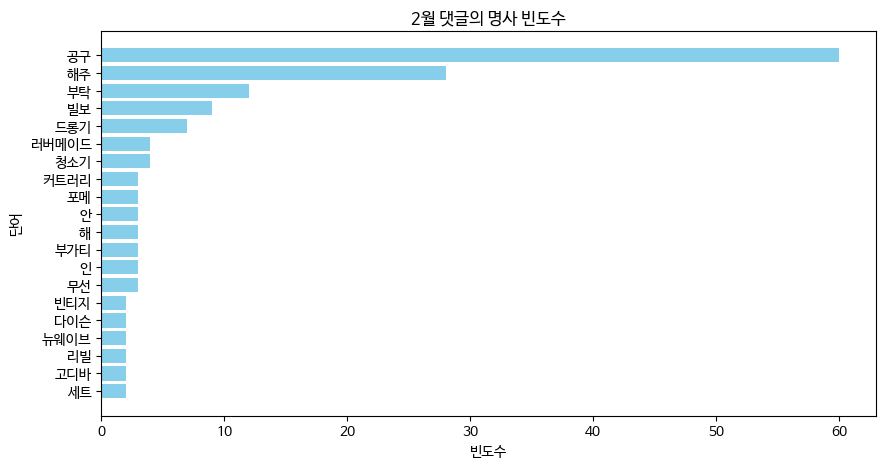

In [8]:
df_feb = df[df['Date'].dt.month == 2].copy()

nouns = []
for comment in df_feb['Cleaned_Content']:
    words = Komoran.pos(comment)
    nouns.extend([word for word, pos in words if pos in ['NNG', 'NNP']])

noun_counts = Counter(nouns)
top_nouns = noun_counts.most_common(20)

plt.figure(figsize = (10, 5))
plt.barh([word[0] for word in top_nouns], [word[1] for word in top_nouns], color = 'skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('2월 댓글의 명사 빈도수')
plt.gca().invert_yaxis()
plt.show()

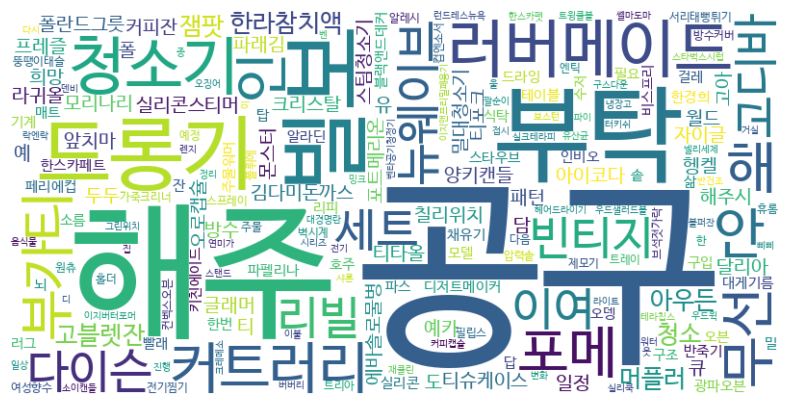

In [9]:
wordcloud = WordCloud(font_path = font_path, background_color = 'white', width = 800, height = 400)
wordcloud.generate_from_frequencies(noun_counts)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()